# Tick 1: numpy

* [Numpy warmup exercises](#Numpy-warmup-exercises---not-assessed) (not assessed)
* [Questions 1a](#Questions-1a---worth-1-mark) (worth 1 mark)
* [Questions 1b](#Questions-1b---worth-1-mark) (worth 1 mark)
* [Investigation](#Investigation---not-assessed) (not assessed)

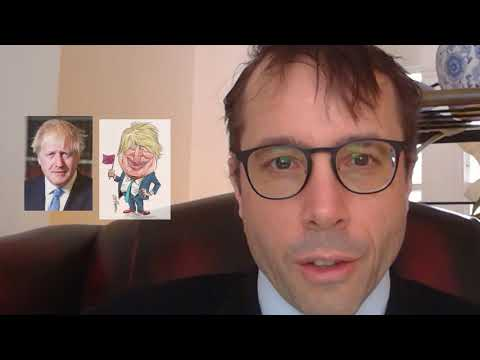

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('H7WmvsYYoVk', width=560, height=315)



* [Sir Patrick Vallence's evidence in the Science and Technology committee](https://committees.parliament.uk/oralevidence/1122/default/)
* [Prof Ferguson's simulator](https://github.com/mrc-ide/covid-sim/blob/ec807e2a6a96dd58f67170b55b82cc5f969a16df/src/Models/Person.h) which has a record for each simulated person
* [Youyang Gu's simulator](https://github.com/youyanggu/yyg-seir-simulator/blob/master/simulation.py) which simply tracks total numbers
* [New York Times survey of models](https://www.nytimes.com/interactive/2020/05/12/upshot/coronavirus-models.html)

We'll model a population of $N$ individuals, each of them either **S**usceptible, or **I**nfected, or **R**ecovered. Once **R**ecovered, they do not become **I**nfected again. Each day, each person goes to a locus. If there are any **I**nfected people in a locus, each **S**usceptible person at that locus has a probability `prob_infect` of becoming **I**nfected. At the end of the day, each person who was **I**nfected at the start of the day **R**ecovers with probability `prob_recover`. (A simple probability calculation shows that the average number of days a person is infected is `1/prob_recover`.)

The spread of the epidemic depends on the number of people gathering in each locus. If some loci have many people, the epidemic will spread quicker. If loci are limited to a small number of people, the epidemic will spread slower. We'll model loci as having random numbers of people, we'll assign people randomly to loci, and we'll generate a new set of loci each day.


<div class="alert alert-warning">This assignment tests your vectorized thinking. You will be asked to run simulations on a population of tens of thousands of individuals, in tens of thousands of locations, over many timesteps. <strong>YOUR CODE MUST USE NUMPY VECTORIZED OPERATIONS</strong> to iterate over the population or over loci. Do not use Python 'for' loops or list comprehensions, and do not use <code style="background-color:inherit">np.vectorize</code> either. For any other iteration, e.g. over simulated timesteps, or over simulation parameters, it's a good idea to use 'for' loops or list comprehension.
</div>

# Numpy warmup exercises - not assessed

These are optional warmup exercises, to get you used to numpy. 
Use the following autograder settings:
```python
import ucamcl
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp').subsection('ex1')
```
For these exercises, there is no answer for you to submit. Instead, the autograder shows a model answer.
Use it like this:
```python
q = GRADER.fetch_question('q1')
print(q)
```

In [6]:
import ucamcl

In [7]:
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp').subsection('ex1')

Waiting for you to log in ... done.


**Question (q1)** from section 2.2. Here is some standard Python code:
```python
import math, random
x = random.uniform(-1, 1)
y = random.uniform(-1, 1)
d = math.sqrt(x**2 + y**2)
```
We'd like to repeat this a million times, and find the mean and standard deviation of the `d` values. Implement this using numpy vectorized code.

In [8]:
import numpy as np

In [9]:
import math, random
x = random.uniform(-1, 1)
y = random.uniform(-1, 1)
d = math.sqrt(x**2 + y**2)


N = 1000000
rng = np.random.default_rng(rand_seed)
xys = rng.uniform(low=-1, high=1, size=(N, 2))
ds = (xys[:, 0]**2 + xys[:, 1]**2)**0.5

mean = np.mean(ds)
std = np.std(ds)

(mean, std)

NameError: name 'rand_seed' is not defined

In [ ]:
q = GRADER.fetch_question('q1')
print(q)

**Question (q2)** from section 2.3. Look up the help for [`np.argmax`](https://docs.scipy.org/doc/numpy/reference/routines.sort.html#searching). Generate the vectors
```python
x = np.linspace(.1,10,1000)
a = x**2
b = 0.01*(np.exp(x)-1)
```
and find the first `x` value at which `a<b`.

In [ ]:
x = np.linspace(.1,10,1000)
a = x**2
b = 0.01*(np.exp(x)-1)

x[np.argmax(a<b)]

In [ ]:
q = GRADER.fetch_question('q2')
print(q)

**Question (q3)** from section 2.3. I have a list of names which I can sort alphabetically using `np.argsort`,
```python
names = np.array(['alexis','chloe','guarav','shay','adrian','rebecca'])
i = np.argsort(names)
names_rank = np.char.add(names[i], np.arange(1,7).astype(str))
```
How can I put `names_rank` back in the original order?

In [ ]:
names = np.array(['alexis','chloe','guarav','shay','adrian','rebecca'])
i = np.argsort(names)
names_rank = np.char.add(names[i], np.arange(1,7).astype(str))

names_rank[i] = np.copy(names_rank)
print(names_rank)

In [ ]:
q = GRADER.fetch_question('q3')
print(q)

**Question (q4)** from section 3. For a numpy matrix `a`, what is the relationship between `a.shape` and `len(a)`?

a.shape gives the full dimensions where as len(a) gives the first dimension.

In [ ]:
q = GRADER.fetch_question('q4')
print(q)

**Question (q5)** from section 3. Look up the numpy help for [`np.arange`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) and [`reshape`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.reshape.html), and use these functions to produce the $3\times5$ matrix
$$
b = \left( \begin{matrix} 
1 & 2 & 3 & 4 & 5\\
6 & 7 & 8 & 9 & 10\\
11 & 12 & 13 & 14 & 15
\end{matrix} \right)
$$

Look up the help for [`np.sum`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html), and compute the length-5 vector of column sums and the length-3 vector of row sums.

In [ ]:
nums = np.arange(1, 16)
nums2 = nums.reshape(3,5)
a = np.sum(nums2, axis=0)
b = np.sum(nums2, axis=1)
(a, b)

In [ ]:
q = GRADER.fetch_question('q5')
print(q)

**Question (q6)** from section 3. Find two different ways to use numpy to create the column vector
`[[1],[2],...,[n]]`.

In [ ]:
n=5
a = np.arange(1, n+1)
print(a)
print(a[:, None])
print(a.reshape(-1,1))
print(np.array([a]).T)

In [ ]:
q = GRADER.fetch_question('q6')
print(q)

**Question (q7)** from section 3. A [permutation matrix](https://en.wikipedia.org/wiki/Permutation_matrix) is a square matrix of 0s and 1s,
where each row contains exactly one 1, and each column likewise. (The code snippet in section 2.3 of notes, for 'advanced indexing', creates a $3\times3$ permutation matrix.)

Write code to generate a random $n\times n$ permutation matrix.

In [ ]:
n = 7
a = np.zeros((n, n), dtype=int)
a[np.arange(n), np.random.permutation(n)] = 1
a

In [ ]:
q = GRADER.fetch_question('q7')
print(q)

**Question (q8)** from section 2.2. In a Exercise ex0 Question q6 you wrote a Pythonic simulator for a queue, based on the recursion
$$
q_{t+1} = \max(q_t + a_t - C, 0).
$$
It can be proved that another way to get the same answer is with the formula
$$
q_t = q_0 + x_t - \min(0, y_t)
$$
where
$$
x_t = \sum_{u=0}^{t-1} (a_u-C)
\quad\text{and}\quad
y_t = \min_{1 \leq u \leq t} (q_0 + x_u).
$$
Given a vector $a=[a_0,a_1,\dots,a_{t-1}]$,
* compute $x=[x_1,x_2,\dots,x_t]$ using [`np.cumsum`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)
* compute $y=[y_1,y_2,\dots,y_t]$ by [accumulating](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ufunc.accumulate.html) the function `np.minimum`
* compute $q=[q_1,q_2,\dots,q_t]$, and check your answer against your Pythonic code.

In [ ]:
q0 = 1
C = 3
a = np.array([4, 1, 2, 8, 2, 3, 1])
x = np.cumsum(a-C)
y = np.minimum.accumulate(q0 + x)
q = q0 + x - np.minimum(0, y)
q

## Questions 1a - worth 1 mark
```python
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp').subsection('tick1a')
```

In [10]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
import ucamcl

In [11]:
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp').subsection('tick1a')

Waiting for you to log in .. done.


**Question (q1).** Here is code to generate a vector of $N$ sizes for loci.
```
def random_sizes(N, avg_size): return np.random.geometric(1/avg_size, size=N)
```
We don't actually want a vector of $N$ sizes, we want a vector of sizes that adds up to $N$. Write a function `trunc_sizes(s)`
that truncates the vector returned by `random_sizes`, and reduces the size of the final locus if necessary. 

```
q = GRADER.fetch_question('q1')
ans = trunc_sizes(q.s)
GRADER.submit_answer(q, ans)
```

In [12]:
def random_sizes(N, avg_size):
    return np.random.geometric(1/avg_size, size=N)

In [13]:
def trunc_sizes(sizes):
    N = len(sizes)
    cummul = np.cumsum(sizes)
    cummul[cummul>N] = 0
    cummul[cummul==0] = sizes[0]
    maxind = np.argmax(cummul) + 1
    if maxind == 1: sizestrunc = sizes[:maxind]
    else: sizestrunc = sizes[:maxind+1]
    lastind = np.size(sizestrunc) - 1
    diff = (np.sum(sizestrunc) - N)
    sizestrunc[lastind] -= diff
    sizestrunc = np.trim_zeros(np.array(sizestrunc))
    return (sizestrunc)

In [14]:
q = GRADER.fetch_question('q1')
ans = trunc_sizes(q.s)

In [15]:
GRADER.submit_answer(q, ans)

Correct!


True

**Question (q2).** Let `loc_sizes` be a vector of locus sizes that sums up to $N$, and let it have length $M$. Write a function
`person_in(loc_sizes)` that computes a length-$N$ vector, containing the index of the locus that each person is in, as in the diagram below. Write another function `first_occ(loc_sizes)` that computes a length-$M$ vector, containing the index of the first person in each locus.

```
q = GRADER.fetch_question('q2')
ans = {'person_in': person_in(q.loc_sizes), 'first_occ': first_occ(q.loc_sizes)}
GRADER.submit_answer(q, ans)
```

<img src="res/tick1_locs.svg" style="width:40em">

In [16]:
def person_in(loc_sizes):
    loc_sizes = np.array(loc_sizes)
    M = np.size(loc_sizes)
    P = np.repeat(np.arange(0, M), loc_sizes)
    return (P)

In [17]:
def first_occ(loc_sizes):
    loc_sizes = np.array(loc_sizes)
    M = np.size(loc_sizes)
    F = np.cumsum(loc_sizes)
    A = np.zeros(M, dtype=int)
    A[1:] = F[:-1]
    return A

In [18]:
q = GRADER.fetch_question('q2')
ans = {'person_in': person_in(q.loc_sizes), 'first_occ': first_occ(q.loc_sizes)}

In [19]:
GRADER.submit_answer(q, ans)

Correct!


True

**Question (q3).** Let `infected` be a vector of length $N$ consisting of 0s and 1s. Write a function `exposure(infected,loc_sizes)` that returns a vector of length $N$, where each entry $i$ counts the number of infected people in the locus that person $i$ is in. 
Assume that people are assigned to loci sequentially, as in the diagram above&mdash;do not implement shuffling at this stage.

```
q = GRADER.fetch_question('q3')
ans = exposure(np.array(q.infected), q.loc_sizes)
GRADER.submit_answer(q, ans)
```

In [20]:
def exposure(infected, loc_sizes):
    infected = np.array(infected)
    loc_sizes = np.array(loc_sizes)
    per_in = person_in(loc_sizes)
    fi_occ = first_occ(loc_sizes)
    
    a = np.cumsum(loc_sizes)
    breaks = np.zeros(np.size(a)+1, dtype=int)
    breaks[1:] = a
    
    sums = np.add.reduceat((infected > 0).astype(int), breaks[:-1], dtype=np.int)
    
    ans = np.repeat(sums, loc_sizes)
    return ans

In [21]:
q = GRADER.fetch_question('q3')
ans = exposure(np.array(q.infected), q.loc_sizes)

In [22]:
GRADER.submit_answer(q, ans)

Correct!


True

**Question (q4).** Write a function 
```python
sim(N, T, n0, avg_loc_size=2.1, prob_infect=0.07, prob_recover=1/10)
```
which runs the simulator on a population of size $N$ for $T$ days, where $n_0$ is the number of people who were initially infected, prior to the first simulated day. Remember that people are assigned randomly to loci.

Your simulator should return a matrix with $T$ rows and 4 columns, which record respectively for each day (1) the number of new infections that day, (2) the number of recoveries that day, (3) the total number infected at the end of that day, (4) the total number recovered by the end of that day. 

```
q = GRADER.fetch_question('q4')
x = sim(N=q.N, T=q.T, ...) # fill in the rest from q
ans = x[-1,3]/q.N
GRADER.submit_answer(q, ans)
```

In [23]:
def sim_infections(infected, exposed, prob_infect):
    infected[infected == 2] = 1
    original_total = np.sum((np.copy(infected) > 0).astype(int))
    infected[((np.random.rand(*infected.shape) < prob_infect).astype(int)==1) & (exposed > 0) & (infected == 0)] = 2
    return ((np.sum((infected > 0).astype(int)) - original_total))
    
def sim_recoveries(infected, exposed, prob_recover):
    original_infected = np.copy(infected)
    original_total = np.sum((original_infected > 0).astype(int))
    probs = np.random.rand(*infected.shape)
    probs = (probs < prob_recover).astype(int)
    infected[(probs==1) & (infected == 1)] = -1
    total = np.sum((infected > 0).astype(int))
    total_recovered = (original_total - total)
    return (total_recovered)

In [24]:
def sim(N, T, n0, avg_loc_size=2.1, prob_infect=0.07, prob_recover=1/10):
    loc_sizes = trunc_sizes(random_sizes(N, avg_loc_size))
    infected = np.zeros(N, dtype=int)
    infected[:n0] = 1
    infected = np.random.permutation(infected)
    exposed = exposure(infected, loc_sizes)
    
    A = np.zeros((T, 4), dtype=int)
    
    for x in range (0, T):
        infected_today = sim_infections(infected, exposed, prob_infect)
        exposed = exposure(infected, loc_sizes)
        recovered_today = sim_recoveries(infected, exposed, prob_recover)
        exposed = exposure(infected, loc_sizes)
        total_infections = np.sum((infected != 0).astype(int))
        total_recoveries = np.sum((infected == -1).astype(int))
        a = [infected_today, recovered_today, total_infections, total_recoveries]
        A[x] = a
        infected = np.random.permutation(infected)
        exposed = exposure(infected, loc_sizes)
        
    
    return A

In [25]:
q = GRADER.fetch_question('q4')
x = sim(N=q.N, T=q.T, n0=q.n0, avg_loc_size=q.avg_loc_size, prob_infect=q.prob_infect, prob_recover=q.prob_recover)
ans = x[-1,3]/q.N

In [26]:
GRADER.submit_answer(q, ans)

Correct!


True

**Question (q5).** Simulate a population of $N=50,000$ over $T=200$ days with $n_0=200$. Plot the percentage of the population that been infected, and that has recovered, with day number on the _x_-axis. Also plot the number of currently infected people, and the number of new infections on each day. 

_You don't have to submit your plot to the autograder, but you must include it in your submitted notebook. Your plot should look something like this. In your plot, you should pay attention to (1) making sure the plots share the same x-axis, (2) colouring the lines and showing a legend. Don't worry about fine-grained control of the plot, such as legend placement or plot size or colour scheme._

<img src="res/tick1_4vars.svg" style="width:30em"/>

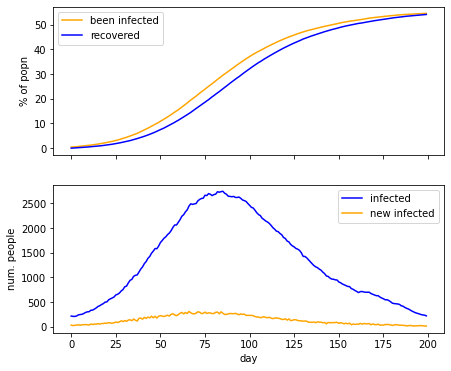

In [27]:
x = sim(N=50000, T=200, n0=200)
day_num = np.arange(0,200)
total_infected_percent = (x[:, 2]/50000) * 100
total_recovered_percent = (x[:, 3]/50000) * 100
total_infected = x[:, 2] - x[:, 3]
daily_infected = x[:, 0]

data = pandas.DataFrame({
'day'          : day_num,
'been_infected': total_infected_percent,
'recovered'    : total_recovered_percent,
'infected'     : total_infected,
'new_infected' : daily_infected
},
columns = ['day', 'been_infected', 'recovered', 'infected', 'new_infected'])


fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7, 6))
ax1.plot(data.day, data.been_infected, label='been infected', color='orange')
ax1.plot(data.day, data.recovered, label='recovered', color='blue')
ax1.legend()
ax1.set_ylabel('% of popn')
ax2.plot(data.day, data.infected, label='infected', color='blue')
ax2.plot(data.day, data.new_infected, label='new infected', color='orange')
ax2.legend()
ax2.set_ylabel('num. people')
plt.xlabel('day')
plt.show()

## Questions 1b - worth 1 mark
```python
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp').subsection('tick1b')
```

In [28]:
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp').subsection('tick1b')

Waiting for you to log in ...........  still waiting.


**Question (q6).** A simple way to estimate the _R_ number is `R=days*N/D` where `N` is the total number of new infections, where `D` is total number of infected-person-days, i.e. what you get by summing over days the number of infected people at the start of each day, and 
where
`days=1/prob_recover` is the average number of days a person is infected.
Write a function 
```python
r(X, t0, t1, days)
```
to compute the _R_ number, where `X` is the matrix produced by your simulator, and `N` and `D` are computed over days `t0,t0+1,...,t1-1`.

```
q = GRADER.fetch_question('q6')
ans = r(np.array(q.X), t0=q.t0, t1=q.t1, days=q.days)
GRADER1b.submit_answer(q, ans)
```

In [ ]:
def r(X, t0, t1, days):
    
    XN = X[t0:t1]
    N = np.sum(XN[:, 0])
    
    XD = X[t0-1:t1-1]
    D = np.sum(XD[:, 2])
    
    R = days*N/D
    return R

In [ ]:
q = GRADER.fetch_question('q6')
ans = r(np.array(q.X), t0=q.t0, t1=q.t1, days=q.days)

In [ ]:
GRADER.submit_answer(q, ans)

**Question (q7).** We wish to model household bubbles separately from public loci. We'll treat household bubbles as just another set of loci, but let each person go to the same household-bubble locus every day.
Bubble sizes can be generated 
using the [distribution of household size in the UK](https://www.statista.com/statistics/281627/households-in-the-united-kingdom-uk-by-size/):
```python
def bubble_sizes(N, num_households):
    return np.random.choice([1,2,3,4,5,6], p=[.29,.35,.15,.14,.05,.02], size=(num_households,N)).sum(0)
```
Modify your simulator so that the $n_0$ initially infected people are the first in the list (to reflect the fact that infections are likely to be clustered in households), and thereafter, on each day,

1. people go to random public loci as before, and may become infected (infection probability `prob_infect`)
2. people go to their home bubbles and may become infected (infection probability `prob_infect_home`)
3. some people may recover, as before

```
q = GRADER1b.fetch_question('q7')
x = sim2(N=q.N, T=q.T, n0=q.n0, ...) # fill in the rest from q
ans = x[-1,3] / q.N
GRADER1b.submit_answer(q, ans)
```

In [ ]:
def bubbles(N, num_households):
    return np.random.choice([1,2,3,4,5,6], p=[.29,.35,.15,.14,.05,.02], size=(num_households,N)).sum(0)

In [ ]:
def sim_infections2(infected, exposed, prob_infect):
    infected[infected == 2] = 1
    original_infected = np.copy(infected)
    original_total = np.sum((original_infected > 0).astype(int))
    probs = np.random.rand(*infected.shape)
    probs = (probs < prob_infect).astype(int)
    infected[(probs==1) & (exposed > 0) & (infected == 0)] = 2
    total = np.sum((infected > 0).astype(int))
    total_infected = (total - original_total)
    return (total_infected)
    
def sim_recoveries2(infected, prob_recover):
    original_infected = np.copy(infected)
    original_total = np.sum((original_infected > 0).astype(int))
    probs = np.random.rand(*infected.shape)
    probs = (probs < prob_recover).astype(int)
    infected[(probs==1) & (infected == 1)] = -1
    total = np.sum((infected > 0).astype(int))
    total_recovered = (original_total - total)
    return (total_recovered)

In [ ]:
def sim2(N, T, n0, avg_loc_size, prob_infect_outside, prob_recover, prob_infect_home, num_households):
    bubble_sizes = trunc_sizes(bubbles(N, num_households))
    loc_sizes = trunc_sizes(random_sizes(N, avg_loc_size))
    
    infected = np.zeros(N, dtype=int)
    infected[:n0] = 1
        
    A = np.zeros((T, 4), dtype=int)
    
    for x in range (0, T):
        rand =  np.random.permutation(np.arange(0,N))
        infected = infected[rand]
        exposed = exposure(infected, loc_sizes)
        infected_today_outside = sim_infections2(infected, exposed, prob_infect_outside)
        exposed = exposure(infected, loc_sizes)

        infected[rand] = np.copy(infected)
        exposed = exposure(infected, bubble_sizes)
        infected_today_home = sim_infections2(infected, exposed, prob_infect_home)
        exposed = exposure(infected, bubble_sizes)
        
        infected_today = infected_today_outside + infected_today_home
        
        recovered_today = sim_recoveries2(infected, prob_recover)
        exposed = exposure(infected, bubble_sizes)
        
        total_infections = np.sum((infected != 0).astype(int))
        
        total_recoveries = np.sum((infected == -1).astype(int))
        
        a = [infected_today, recovered_today, total_infections, total_recoveries]
        A[x] = a
        
        exposed = exposure(infected, loc_sizes)
        
    return A

In [ ]:
q = GRADER.fetch_question('q7')
x = sim2(N=q.N, T=q.T, n0=q.n0, avg_loc_size=q.avg_loc_size,
         prob_infect_outside=q.prob_infect, prob_recover=q.prob_recover, prob_infect_home=q.prob_infect_home,
         num_households=q.num_households)
ans = x[-1,3] / q.N

In [ ]:
GRADER.submit_answer(q, ans)

**Question (q8).** Simulate a population of $N=100,000$ over $T=200$ days with parameters $n_0=2000$, `prob_infect_home=.2`, `prob_infect=.01`, `avg_loc_size=2.1`, and `prob_recover=1/10`, for bubble sizes 1,2,3,4. Run five different simulations for each bubble size. Plot the percentage of the population that has been infected, and the number of currently infected people, on each day. 

_You don't have to submit your plot to the autograder, but you must include it in your submitted notebook. Your plot should look something like this. In your plot, you should pay attention to (1) making sure the plots share the same x-axis, (2) colouring the lines and showing a legend. Don't worry about fine-grained control of the plot, such as legend placement or plot size or colour scheme._

<img src="res/tick1_bubble.svg" style="width:30em"/>

In [ ]:
%%time
import math

day_num = np.arange(0,200)
data = pandas.DataFrame({'day' : day_num}, columns=['day'])

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7,7))

colours = ['red', 'purple', 'brown', 'grey']

for m in range(1, 5):
    for n in range(0, 5):
        x = sim2(N=100000, T=200, n0=2000, prob_infect_home=.2, prob_infect_outside=.01, avg_loc_size=2.1, prob_recover=1/10,
                 num_households=m)
        total_infected_percent = (x[:, 2]/100000) * 100
        total_infected = x[:, 2] - x[:, 3]
        data['been_infected_'+str(m)+'_'+str(n)] = total_infected_percent
        data['infected_'+str(m)+'_'+str(n)] = total_infected
        label1 = "data.been_infected_" + str(m) + '_' + str(n)
        label2 = "data.infected_" + str(m) + '_' + str(n)
        ax1.plot(data.day, eval(label1), label= str(m) + ' hshlds', color=colours[m-1])
        ax2.plot(data.day, eval(label2), label= str(m) + ' hshlds', color=colours[m-1])

        
ax1.set_ylabel('% of popn been infected')
ax2.set_ylabel('num. people infected')
plt.xlabel('day')
handles, labels = ax2.get_legend_handles_labels()
handles = np.array(handles)
labels = np.array(labels)
h = handles[[0, 5, 10, 15]]
l = labels[[0, 5, 10, 15]]
fig.legend(h, l, loc='lower center', mode = "expand", ncol = 4)
plt.show()

**Question (q9).** Run your simulator for bubble sizes 1, 2, 3, 4, and compute the _R_ number as measured over timespan `t0=10` to `t1=25` to capture the initial wave.

```
ans = ... # array of four numbers, the R number of bubble sizes [1,2,3,4]
GRADER1b.submit_answer(GRADER1b.fetch_question('q9'), ans)
```

In [ ]:
def r2(X, t0, t1, days):
    
    XN = X[t0:t1]
    N = np.sum(XN[:, 0])
    
    XD = X[t0-1:t1-1]
    D = np.sum(XD[:, 2] - XD[:, 3])
    
    R = days*N/D
    return R

In [ ]:
ans = []

for b in range(1, 5):
    x = sim2(N=100000, T=200, n0=2000, prob_infect_home=.2, prob_infect_outside=.01, avg_loc_size=2.1, prob_recover=1/10, 
             num_households=b)
    R = r2(x, 10, 25, 10)
    ans.append(R)

print(ans)

GRADER.submit_answer(GRADER.fetch_question('q9'), ans)

## Investigation - not assessed

For 1a: Try different values for average locus size, and plot the _R_ number as a function of average locus size. Try different distributions of locus size, and again plot _R_ as a function of average locus size. Can you suggest an approximate formula for how _R_ depends on average locus size? How about how _R_ depends on average locus size and on `prob_infect`?

For 1b: Can you suggest an approximate formula for how _R_ depends on average number of people in a bubble, and on `prob_infect_home`?